# MSBA 320 Final Project on Airbnb Seattle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
airbnb = pd.read_csv('airbnb_seattle.csv')

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighborhood_group,neighborhood,seattle_region,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1.322611e+07,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,1884549,Denise & Sean,Rainier Valley,Columbia City,south,47.56555,-122.29385,Entire home/apt,240,4,24,12/1/2022,0.28,1,9,5
1,1.251895e+07,Guest suite in Seattle · ★5.0 · 2 bedrooms · 6...,12677600,Joe,Other neighborhoods,Green Lake,north,47.68243,-122.33086,Entire home/apt,200,3,60,6/13/2023,0.71,1,113,9
2,5.220000e+17,Serviced apartment in Seattle · Studio · 1 bath,48005494,Zeus,Ballard,Adams,north,47.66646,-122.37650,Entire home/apt,81,30,2,4/10/2023,0.44,36,191,2
3,1.788917e+07,Rental unit in Seattle · ★5.0 · 1 bedroom · 1 ...,66909032,Randy,Other neighborhoods,Wallingford,north,47.65480,-122.34042,Entire home/apt,125,30,28,5/6/2023,0.38,4,307,4
4,1.591780e+07,Home in Seattle · ★4.60 · Studio · 3 beds · 1 ...,38021932,Rocky,Capitol Hill,Montlake,central,47.64017,-122.32271,Entire home/apt,128,30,31,7/31/2022,0.38,1,316,2


In [4]:
airbnb.tail()

,id,name,host_id,host_name,neighborhood_group,neighborhood,seattle_region,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6631,33833730.0,Serviced apartment in Seattle · ★3.0 · 1 bedro...,124558729,Matt,Downtown,Central Business District,central,47.60874,-122.33744,Entire home/apt,215,30,3,6/25/2019,0.06,4,0,0
6632,33845521.0,Serviced apartment in Seattle · 1 bedroom · 1 ...,124558729,Matt,Downtown,Central Business District,central,47.60888,-122.33545,Entire home/apt,200,30,0,NaN,0.00,4,0,0
6633,4400811.0,Home in Seattle · ★4.85 · 2 bedrooms · 2 beds ...,4199445,Liam,Rainier Valley,Mount Baker,south,47.57129,-122.29086,Entire home/apt,189,4,119,6/10/2023,1.15,2,2,9
6634,36519711.0,Home in Seattle · 1 bedroom · 1 bed · 1 privat...,6645582,John,Other neighborhoods,Wedgwood,north,47.69405,-122.30236,Private room,70,30,0,NaN,0.00,1,0,0
6635,51107857.0,Serviced apartment in Seattle · ★4.30 · 1 bedr...,122723469,Pierre,Other neighborhoods,Fremont,north,47.65952,-122.34785,Entire home/apt,280,30,10,10/24/2021,0.43,1,0,0


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6636 non-null   float64
 1   name                            6636 non-null   object 
 2   host_id                         6636 non-null   int64  
 3   host_name                       6636 non-null   object 
 4   neighborhood_group              6636 non-null   object 
 5   neighborhood                    6636 non-null   object 
 6   seattle_region                  6636 non-null   object 
 7   latitude                        6636 non-null   float64
 8   longitude                       6636 non-null   float64
 9   room_type                       6636 non-null   object 
 10  price                           6636 non-null   int64  
 11  minimum_nights                  6636 non-null   int64  
 12  number_of_reviews               66

In [6]:
# change datatype of last_review from string to date
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

In [7]:
airbnb.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighborhood_group                   0
neighborhood                         0
seattle_region                       0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1074
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [8]:
# Interesting observation: max for price is $10,000... This seems absurdly high.

# Should look into listings with values that high.

airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.636000e+03,6.636000e+03,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,3.075648e+17,1.425390e+08,47.626700,-122.334122,202.566154,11.940024,64.055154,1.846640,34.805304,175.107746,17.174804
std,3.715655e+17,1.592410e+08,0.049349,0.033042,288.422541,19.000116,103.263320,1.986252,94.442932,120.557429,22.952437
min,6.606000e+03,2.536000e+03,47.495874,-122.419050,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.684482e+07,1.726991e+07,47.601959,-122.356382,111.000000,2.000000,2.000000,0.220000,1.000000,62.000000,1.000000
50%,5.168138e+07,7.841895e+07,47.623265,-122.333007,158.500000,2.000000,23.000000,1.230000,2.000000,162.000000,7.000000
75%,7.070000e+17,2.293122e+08,47.664345,-122.311175,238.000000,30.000000,80.000000,2.910000,14.000000,298.000000,27.000000
max,9.200000e+17,5.211079e+08,47.734010,-122.240870,10000.000000,365.000000,1281.000000,22.470000,398.000000,365.000000,346.000000


In [9]:
# rename columns

airbnb.rename(columns={'neighbourhood_group':'neighborhood_group', 'neighbourhood':'neighborhood'}, inplace=True)

In [10]:
# filter by price equals $10,000 

# Note: host_name is the same, 'Jen'

# After some digging on airbnb website, the host lists the place for $10,000 but when go through the booking process, 
# prices changes. Is it a tactic to grab prospective guests' attention? 

# Update price or delete for analysis?
airbnb.loc[airbnb['price'] == 10000]

,id,name,host_id,host_name,neighborhood_group,neighborhood,seattle_region,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3344,6.590000e+17,Home in Seattle · ★4.33 · 6 bedrooms · 7 beds ...,241568755,Jen,Other neighborhoods,Greenwood,north,47.70209,-122.35982,Entire home/apt,10000,2,3,2022-10-02,0.28,6,305,3
3725,6.710000e+17,Home in Seattle · ★4.25 · 2 bedrooms · 3 beds ...,241568755,Jen,Other neighborhoods,Fremont,north,47.66307,-122.34773,Entire home/apt,10000,2,12,2022-10-10,1.07,6,146,12
3768,5.680000e+17,Home in Seattle · ★4.67 · 3 bedrooms · 4 beds ...,241568755,Jen,Other neighborhoods,Greenwood,north,47.70245,-122.36159,Entire home/apt,10000,2,12,2023-06-04,1.06,6,307,12
4419,6.570000e+17,Home in Seattle · ★4.33 · 3 bedrooms · 3 beds ...,241568755,Jen,Other neighborhoods,Fremont,north,47.66479,-122.34788,Entire home/apt,10000,2,15,2022-12-04,1.30,6,147,15


In [11]:
# Upon further analysis, I have decided to drop rows with host_id = 241568755
# I went through each listing on Airbnb website for this host.
# Price changes depending on duration and day of the week, which makes it infeasible to update these absurd values with
# updated prices. 

# NOTE FOR THE READERS: price fluctuates depending on the day of the week reserved.

airbnb.loc[airbnb['host_id'] == 241568755]

,id,name,host_id,host_name,neighborhood_group,neighborhood,seattle_region,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3344,6.590000e+17,Home in Seattle · ★4.33 · 6 bedrooms · 7 beds ...,241568755,Jen,Other neighborhoods,Greenwood,north,47.70209,-122.35982,Entire home/apt,10000,2,3,2022-10-02,0.28,6,305,3
3725,6.710000e+17,Home in Seattle · ★4.25 · 2 bedrooms · 3 beds ...,241568755,Jen,Other neighborhoods,Fremont,north,47.66307,-122.34773,Entire home/apt,10000,2,12,2022-10-10,1.07,6,146,12
3768,5.680000e+17,Home in Seattle · ★4.67 · 3 bedrooms · 4 beds ...,241568755,Jen,Other neighborhoods,Greenwood,north,47.70245,-122.36159,Entire home/apt,10000,2,12,2023-06-04,1.06,6,307,12
4419,6.570000e+17,Home in Seattle · ★4.33 · 3 bedrooms · 3 beds ...,241568755,Jen,Other neighborhoods,Fremont,north,47.66479,-122.34788,Entire home/apt,10000,2,15,2022-12-04,1.30,6,147,15
4734,5.810000e+17,Home in Seattle · ★4.82 · 3 bedrooms · 3 beds ...,241568755,Jen,Other neighborhoods,Greenwood,north,47.70211,-122.36142,Entire home/apt,2587,2,11,2022-10-17,0.78,6,336,7
5955,6.720000e+17,Home in Seattle · 6 bedrooms · 6 beds · 3.5 baths,241568755,Jen,Other neighborhoods,Wallingford,north,47.66315,-122.34664,Entire home/apt,4728,2,2,2022-12-20,0.28,6,146,2


In [12]:
# filter by price equals $0.

# only room_type of hotel and price is equal to 0. 

# This row may be dropped for analysis.
airbnb.loc[airbnb['price'] == 0]

,id,name,host_id,host_name,neighborhood_group,neighborhood,seattle_region,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2875,49229073.0,Hotel in Seattle · ★4.82 · Studio,267653164,Hotel Theodore,Downtown,Central Business District,central,47.612532,-122.333287,Hotel room,0,1,179,2023-03-10,4.28,1,0,19


In [13]:
# To check if there are any more absurd values.
# I went through each listing, only listings with a host_id (241568755) seem illogical.
airbnb.sort_values(by='price', ascending=False).head(10)

,id,name,host_id,host_name,neighborhood_group,neighborhood,seattle_region,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3768,5.680000e+17,Home in Seattle · ★4.67 · 3 bedrooms · 4 beds ...,241568755,Jen,Other neighborhoods,Greenwood,north,47.70245,-122.361590,Entire home/apt,10000,2,12,2023-06-04,1.06,6,307,12
3344,6.590000e+17,Home in Seattle · ★4.33 · 6 bedrooms · 7 beds ...,241568755,Jen,Other neighborhoods,Greenwood,north,47.70209,-122.359820,Entire home/apt,10000,2,3,2022-10-02,0.28,6,305,3
4419,6.570000e+17,Home in Seattle · ★4.33 · 3 bedrooms · 3 beds ...,241568755,Jen,Other neighborhoods,Fremont,north,47.66479,-122.347880,Entire home/apt,10000,2,15,2022-12-04,1.30,6,147,15
3725,6.710000e+17,Home in Seattle · ★4.25 · 2 bedrooms · 3 beds ...,241568755,Jen,Other neighborhoods,Fremont,north,47.66307,-122.347730,Entire home/apt,10000,2,12,2022-10-10,1.07,6,146,12
5955,6.720000e+17,Home in Seattle · 6 bedrooms · 6 beds · 3.5 baths,241568755,Jen,Other neighborhoods,Wallingford,north,47.66315,-122.346640,Entire home/apt,4728,2,2,2022-12-20,0.28,6,146,2
6360,4.790735e+07,Home in Seattle · 3 bedrooms · 4 beds · 2.5 baths,60856620,Jeff,Rainier Valley,Mount Baker,south,47.56586,-122.286870,Entire home/apt,3200,1,0,NaT,0.00,1,27,0
925,4.921146e+07,Condo in Seattle · 1 bedroom · 1 bath,160392384,Jeff,Downtown,Belltown,central,47.61781,-122.331290,Entire home/apt,3000,180,0,NaT,0.00,1,176,0
4734,5.810000e+17,Home in Seattle · ★4.82 · 3 bedrooms · 3 beds ...,241568755,Jen,Other neighborhoods,Greenwood,north,47.70211,-122.361420,Entire home/apt,2587,2,11,2022-10-17,0.78,6,336,7
4485,5.710000e+17,Home in Seattle · 5 bedrooms · 5 beds · 6 baths,281964950,Anna,Queen Anne,Lower Queen Anne,central,47.62990,-122.361720,Entire home/apt,1800,2,2,2023-06-09,0.29,1,342,2
5754,6.730000e+17,Condo in Seattle · 1 bedroom · 2 beds · 1 bath,365853874,Thomas,Downtown,Belltown,central,47.61229,-122.343424,Entire home/apt,1786,180,0,NaT,0.00,1,364,0


In [14]:
# Drop rows with host_id = 241568755 (Jen)
airbnb = airbnb.drop(airbnb[airbnb['host_id'] == 241568755].index)

In [15]:
# Drop row with host_id = 267653164 (price = 0)
airbnb = airbnb.drop(airbnb[airbnb['host_id'] == 267653164].index)

In [16]:
# replace 'Other neighborhoods' values with 'Other'
airbnb.loc[airbnb['neighborhood_group'] == 'Other neighborhoods', 'neighborhood_group'] = 'Other'

# replace 'University District' values with 'U District'
airbnb.loc[airbnb['neighborhood_group'] == 'University District', 'neighborhood_group'] = 'U District'

In [17]:
# group by neighborhood_group and average the price and rearrange in descending order
neighbor_group = airbnb.groupby(['neighborhood_group'])['price'].mean().to_frame().reset_index().sort_values(by=['price'], ascending=True)

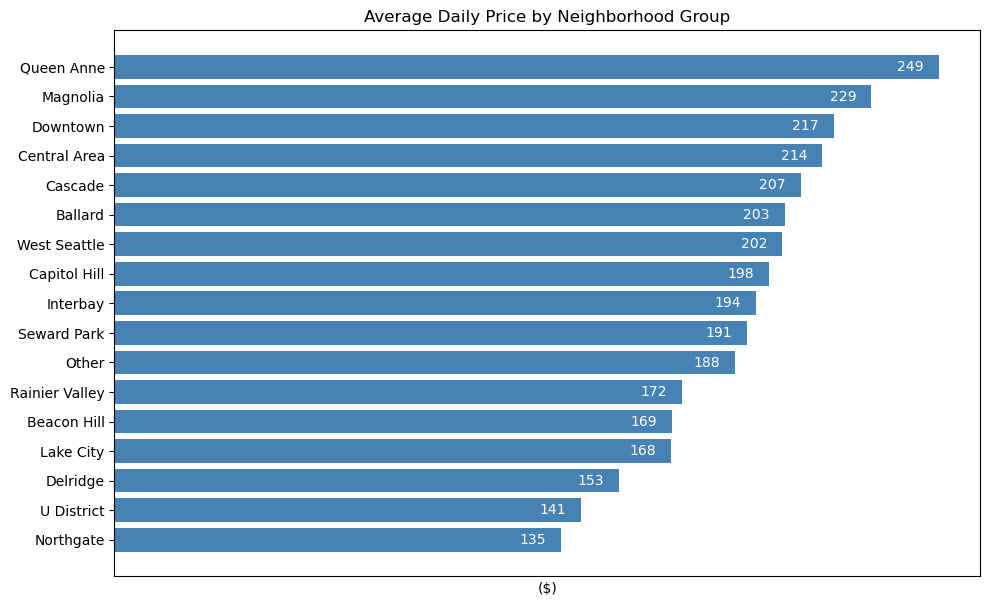

In [18]:
# Plots average daily price by neighborhood_group

fig, ax = plt.subplots(figsize=(10,6))
bar = ax.barh(neighbor_group['neighborhood_group'], neighbor_group['price'], color='steelblue')
plt.tight_layout()

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    label = '{:,.0f}'.format(x_value)
    space = -30
    plt.annotate(label, (x_value, y_value), xytext=(space,0), textcoords='offset points', va='center', ha='left',color='white')

plt.xticks([])
plt.xlabel('($)')
plt.title('Average Daily Price by Neighborhood Group')
plt.show()

In [19]:
# subset data by 'Other'

# What is included in the 'Other' neighborhood group? create table?
airbnb_other = airbnb.loc[airbnb['neighborhood_group'] == 'Other']

In [20]:
# group by neighborhood and calculate average price
neighborhood = airbnb_other.groupby(['neighborhood'])['price'].mean().to_frame().reset_index().sort_values(by=['price'], ascending=True)

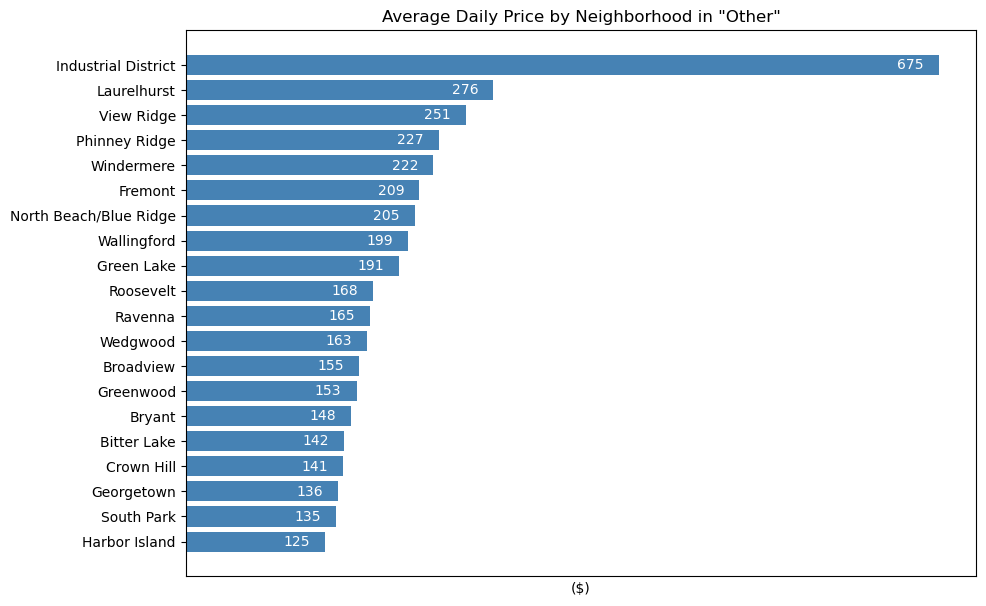

In [21]:
# Plot Average Daily Price for 'Other' neighborhood_group

fig, ax = plt.subplots(figsize=(10,6))
bar = ax.barh(neighborhood['neighborhood'], neighborhood['price'], color='steelblue')
plt.tight_layout()

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    label = '{:,.0f}'.format(x_value)
    space = -30
    plt.annotate(label, (x_value, y_value), xytext=(space,0), textcoords='offset points', va='center', ha='left',color='white')

plt.xticks([])
plt.xlabel('($)')
plt.title('Average Daily Price by Neighborhood in "Other"')
plt.show()

# Room Type and Price Analysis

In [22]:
# group by room_type and calculate average price
room_type = airbnb.groupby(['room_type'])['price'].mean().to_frame().reset_index().sort_values(by=['price'], ascending=True)

In [23]:
room_type

,room_type,price
2,Shared room,79.411765
1,Private room,104.281525
0,Entire home/apt,212.718554


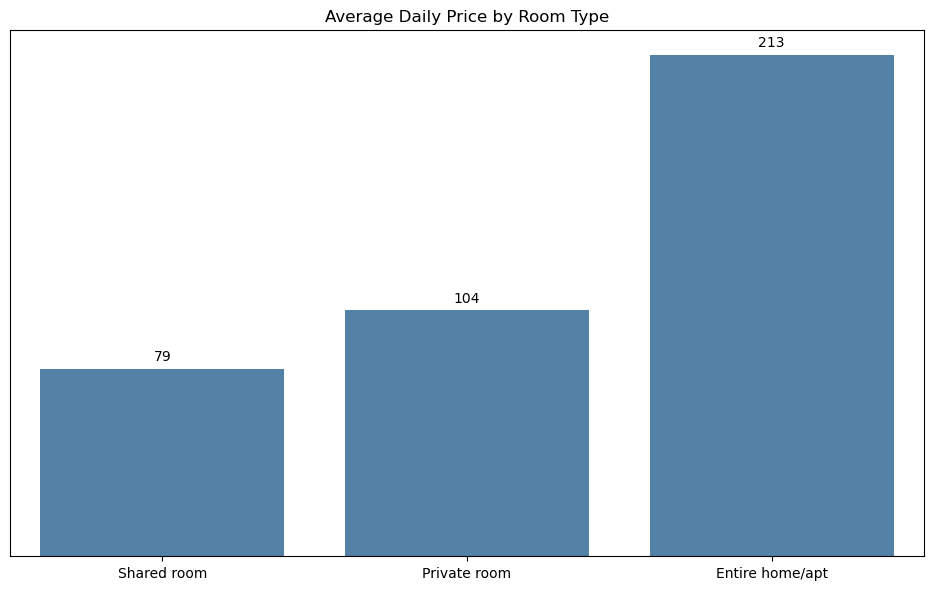

In [24]:
# Plot room_type and average price
plt.subplots(figsize=(10,6))
splot = sns.barplot(x='room_type', y='price', data=room_type, color='steelblue')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.title('Average Daily Price by Room Type')
plt.show()

# Number of listing 

In [25]:
neighborgroup_count = airbnb.groupby(['neighborhood_group'])['host_id'].count().to_frame().reset_index().sort_values(by=['host_id'], ascending=False)

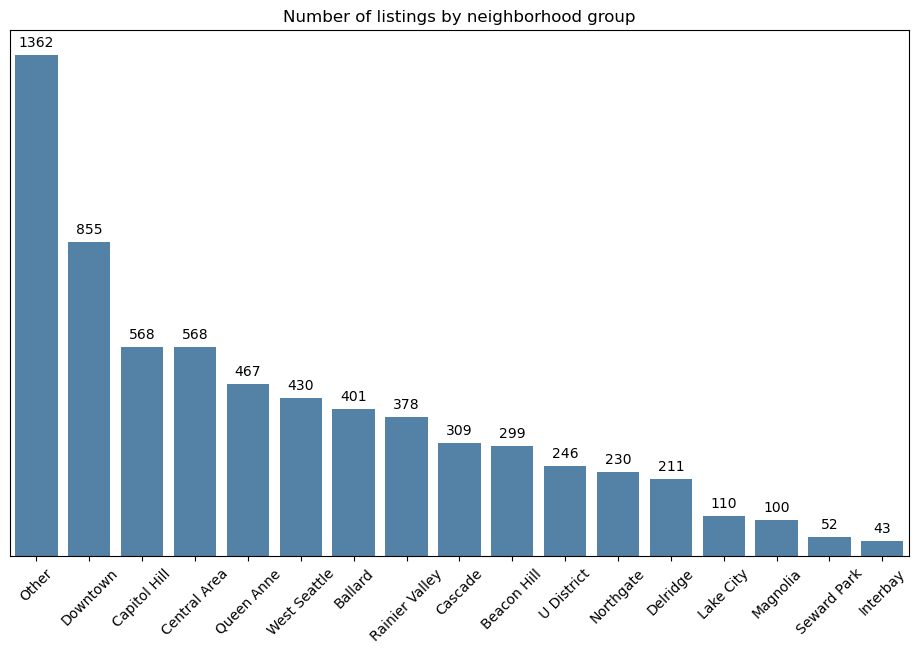

In [26]:
# Plot number of listings by room type
plt.subplots(figsize=(10,6))
splot = sns.barplot(x='neighborhood_group', y='host_id', data=neighborgroup_count, color='steelblue')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points',
                  )
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.title('Number of listings by neighborhood group')
plt.xticks(rotation=45)
plt.show()

In [27]:
# group by neighborhood and calculate average price
neighborhood = airbnb_other.groupby(['neighborhood'])['host_id'].count().to_frame().reset_index().sort_values(by=['host_id'], ascending=False)

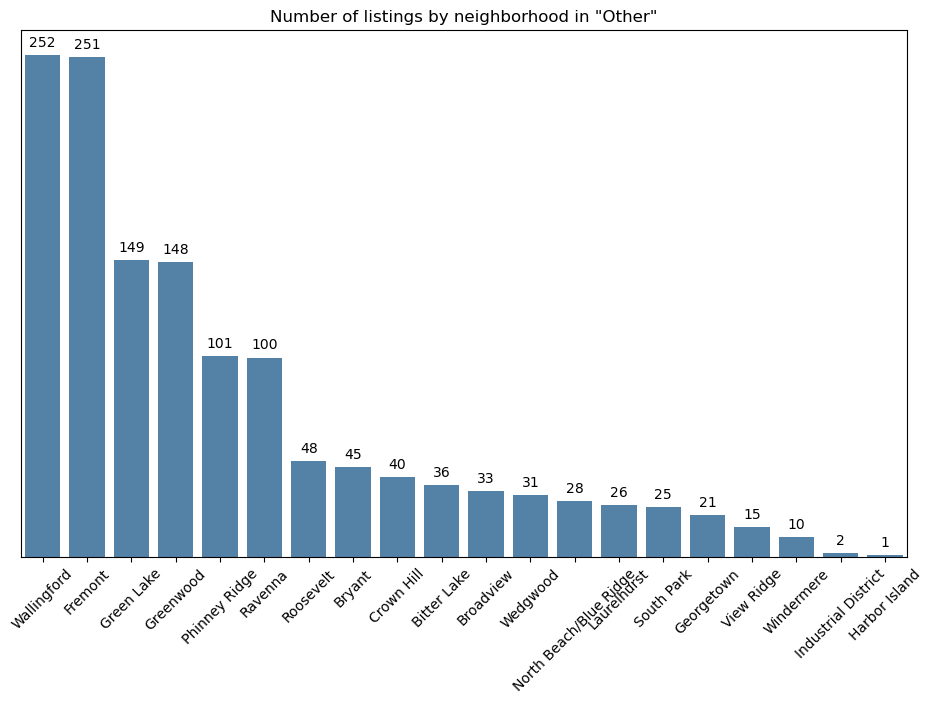

In [28]:
# Plot number of listings by room type
plt.subplots(figsize=(10,6))
splot = sns.barplot(x='neighborhood', y='host_id', data=neighborhood, color='steelblue')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points',
                  )
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.title('Number of listings by neighborhood in "Other"')
plt.xticks(rotation=45)
plt.show()

In [29]:
# number of listings by room type
room_type_count = airbnb.groupby(['room_type'])['price'].count().to_frame().reset_index()

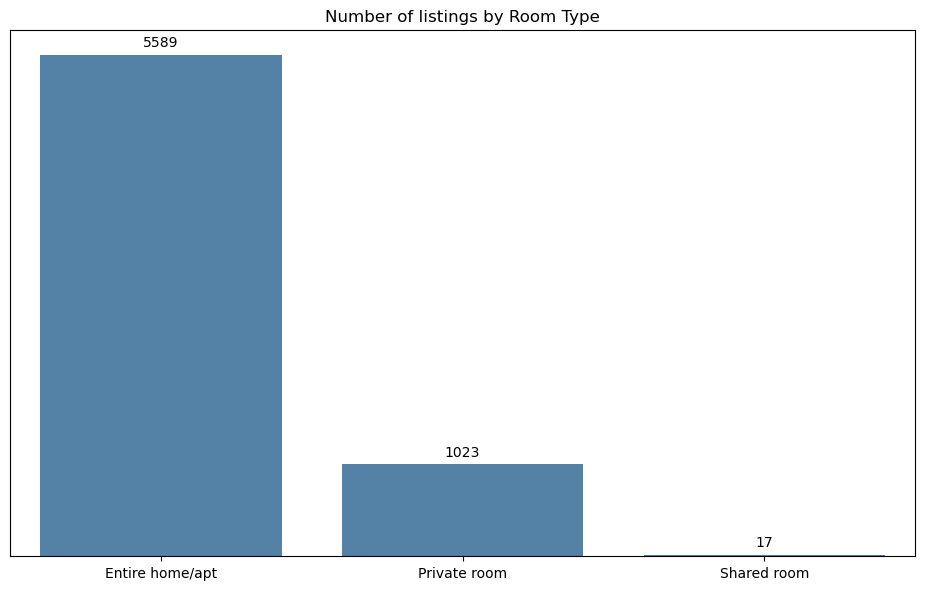

In [30]:
# Plot number of listings by room type
plt.subplots(figsize=(10,6))
splot = sns.barplot(x='room_type', y='price', data=room_type_count, color='steelblue')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points',
                  )
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.title('Number of listings by Room Type')
plt.show()

In [31]:
# number of listings by seattle region
seattle_region_count = airbnb.groupby(['seattle_region'])['host_id'].count().to_frame().reset_index().sort_values(by=['host_id'], ascending=False)

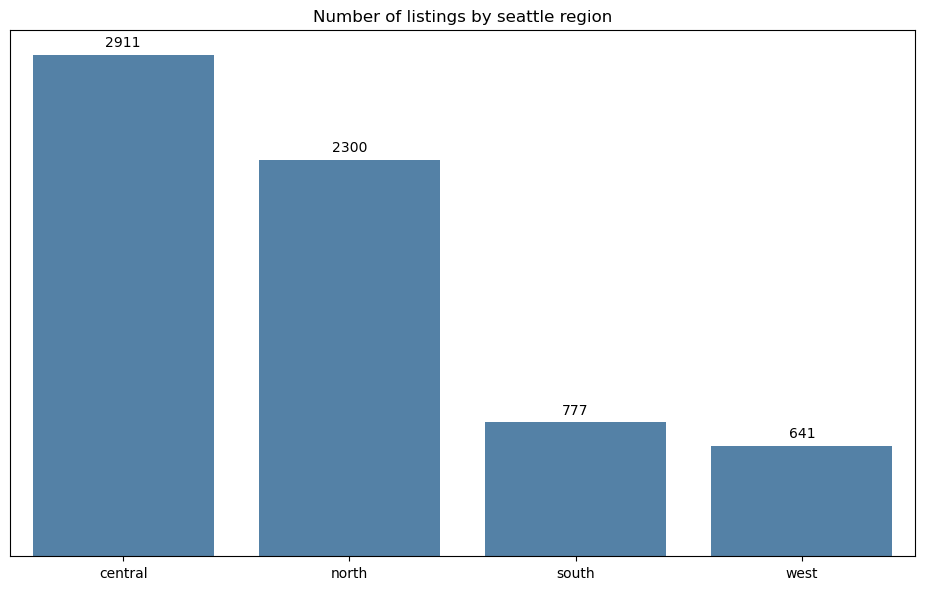

In [32]:
# Plot number of listings by seattle region
plt.subplots(figsize=(10,6))
splot = sns.barplot(x='seattle_region', y='host_id', data=seattle_region_count, color='steelblue')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points',
                  )
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.title('Number of listings by seattle region')
plt.show()

In [33]:
# group by room_type and calculate average price
seattle_region = airbnb.groupby(['seattle_region'])['price'].mean().to_frame().reset_index()

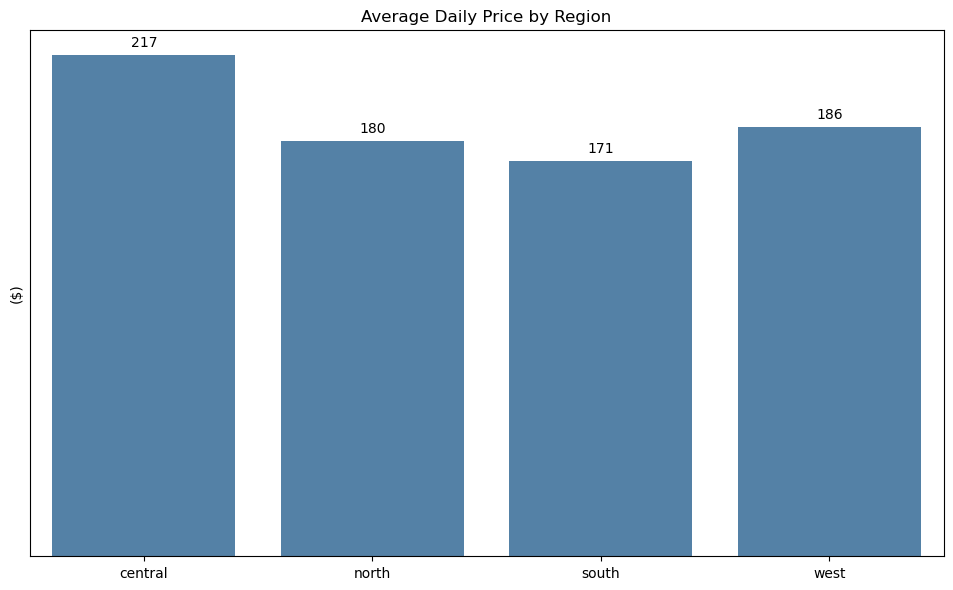

In [34]:
# Plot room_type and average price
plt.subplots(figsize=(10,6))
splot = sns.barplot(x='seattle_region', y='price', data=seattle_region, color='steelblue')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.yticks([])
plt.ylabel('($)')
plt.xlabel('')
plt.title('Average Daily Price by Region')
plt.show()

# Price and Average Price distribution 

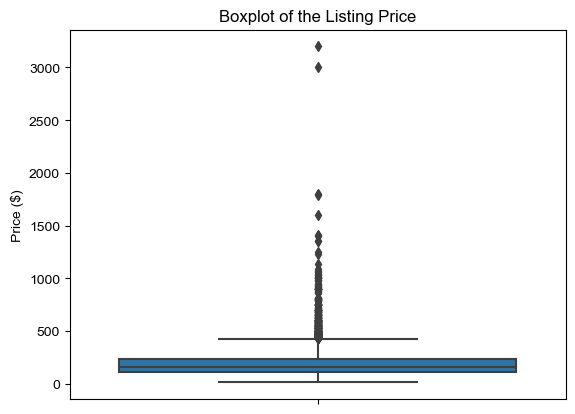

count    6629.000000
mean      195.642480
std       146.095197
min        13.000000
25%       111.000000
50%       158.000000
75%       238.000000
max      3200.000000
Name: price, dtype: float64


In [35]:
sns.boxplot(y=airbnb['price'])
plt.ylabel('Price ($)')
sns.set(style='whitegrid')
plt.title('Boxplot of the Listing Price')
plt.show()

print(airbnb['price'].describe())

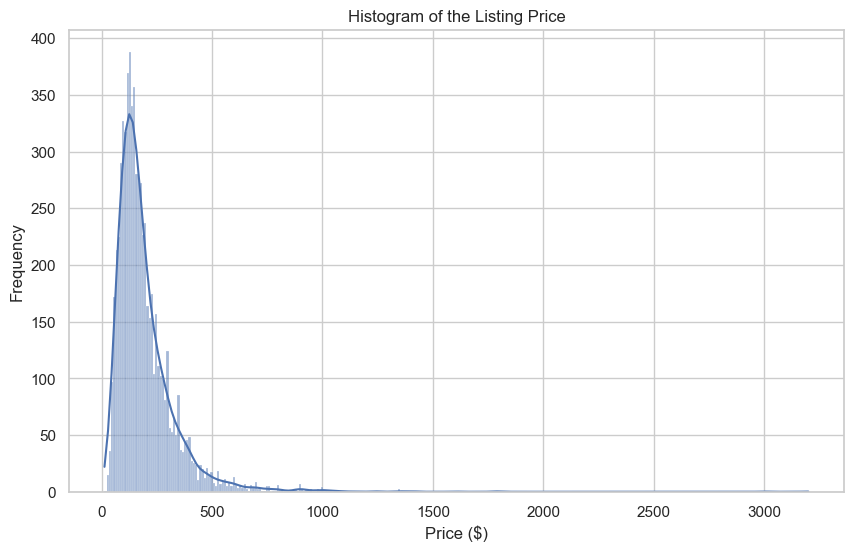

In [36]:
plt.subplots(figsize=(10,6))
sns.histplot(data=airbnb, x='price', binwidth=10, kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram of the Listing Price')
plt.show()

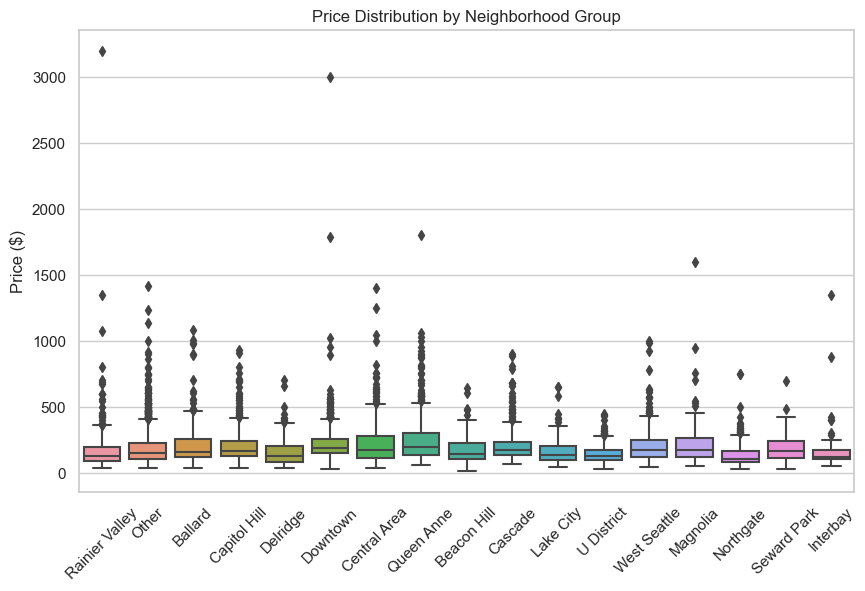

In [37]:
# Plots distribution of prices by neighborhood group
plt.subplots(figsize=(10,6))
sns.boxplot(x='neighborhood_group', y='price', data=airbnb)
plt.ylabel('Price ($)')
plt.xlabel('')
plt.title('Price Distribution by Neighborhood Group')
plt.xticks(rotation=45)
sns.set(style='whitegrid')
plt.show()

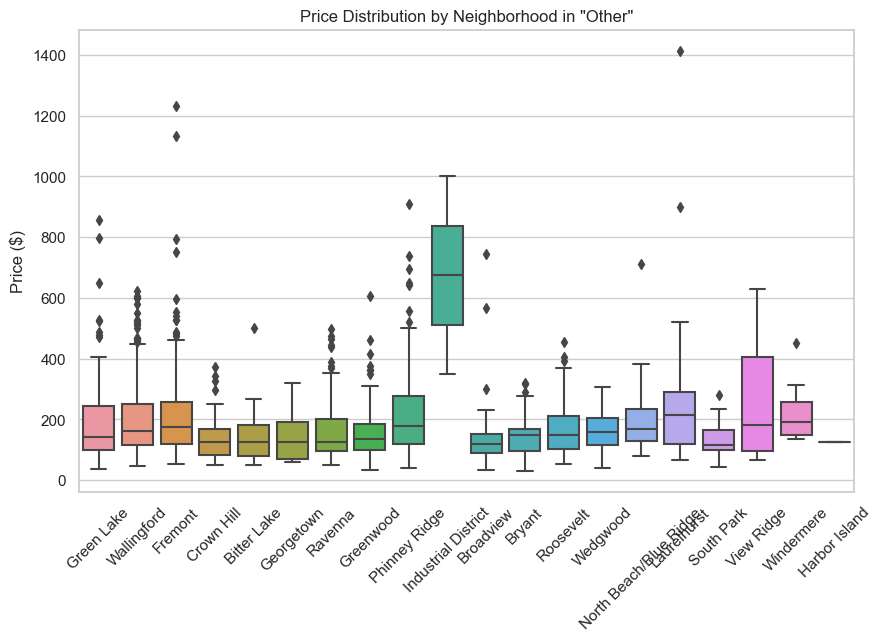

In [38]:
# Plots distribution of prices by neighborhood in "Other" area.
plt.subplots(figsize=(10,6))
sns.boxplot(x='neighborhood', y='price', data=airbnb_other)
plt.ylabel('Price ($)')
plt.xlabel('')
plt.title('Price Distribution by Neighborhood in "Other"')
plt.xticks(rotation=45)
sns.set(style='whitegrid')
plt.show()

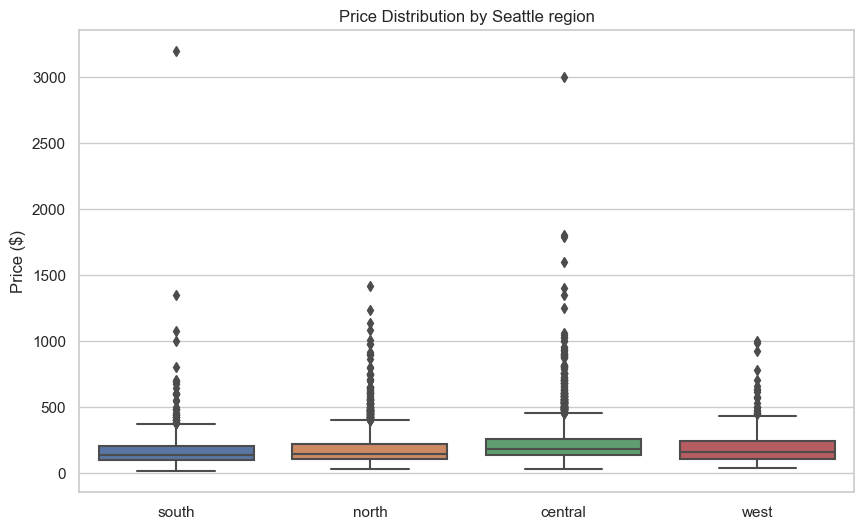

In [39]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='seattle_region', y='price', data=airbnb)
plt.ylabel('Price ($)')
plt.xlabel('')
plt.title('Price Distribution by Seattle region')
sns.set(style='whitegrid')
plt.show()

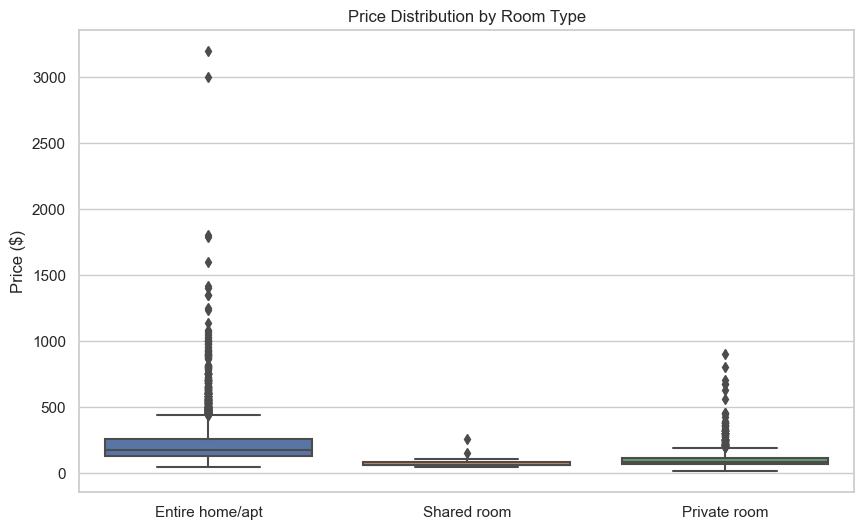

In [40]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=airbnb)
plt.ylabel('Price ($)')
plt.xlabel('')
plt.title('Price Distribution by Room Type')
sns.set(style='whitegrid')
plt.show()

# minimum night analysis

In [41]:
# Purpose of this section is to determine if the average daily price is statistically different depending on minimum night listing. 
# Hypothesis: there is no difference
# Alternative Hypothesis: there is difference.

# Compare minimum night 1 to minimum night 2.
# and do an ANOVA test with minimum night 1, 2, and 30 (top 3 most popular minimum nights)

# group by minimum night and calculate average price
minimum_night_avg_price = airbnb.groupby(['minimum_nights'])['price'].mean().to_frame().reset_index()

In [42]:
minimum_night_avg_price

,minimum_nights,price
0,1,188.130829
1,2,210.880965
2,3,234.615165
3,4,274.172414
4,5,196.657143
5,6,252.511628
6,7,268.561404
7,8,73.000000
8,10,110.170455
9,11,112.000000


In [43]:
# Sort the count of minimum_night 

# Finding: minimum night 1, 2, and 30 are top 3.
minimum_night_count = airbnb.groupby(['minimum_nights'])['price'].count().to_frame().reset_index()

In [44]:
# renamae column from price to count.

minimum_night_count.rename(columns= {'price':'Count'}, inplace = True)

In [45]:
minimum_night_count

,minimum_nights,Count
0,1,1544
1,2,1823
2,3,699
3,4,145
4,5,105
5,6,43
6,7,114
7,8,4
8,10,88
9,11,1


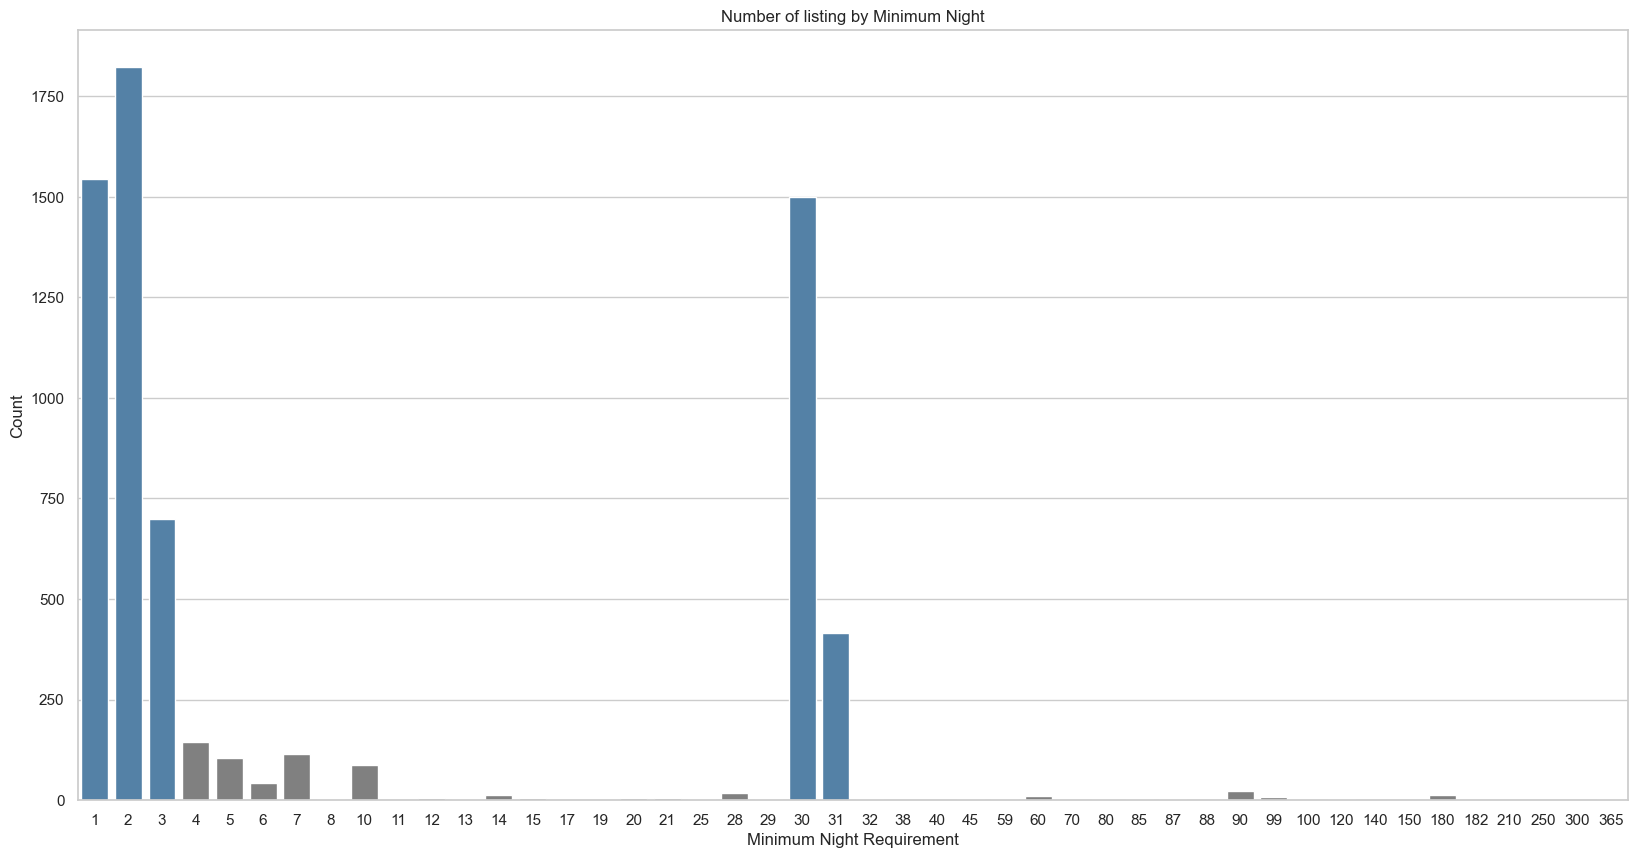

In [46]:
# Top 5 minimum_nights requirement from listings.

cols = ['steelblue' if x > 400 else 'grey' for x in minimum_night_count.Count]

#create barplot with custom colors
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=minimum_night_count.minimum_nights, y=minimum_night_count.Count, palette=cols)
plt.xlabel('Minimum Night Requirement')
plt.title('Number of listing by Minimum Night')
plt.show()

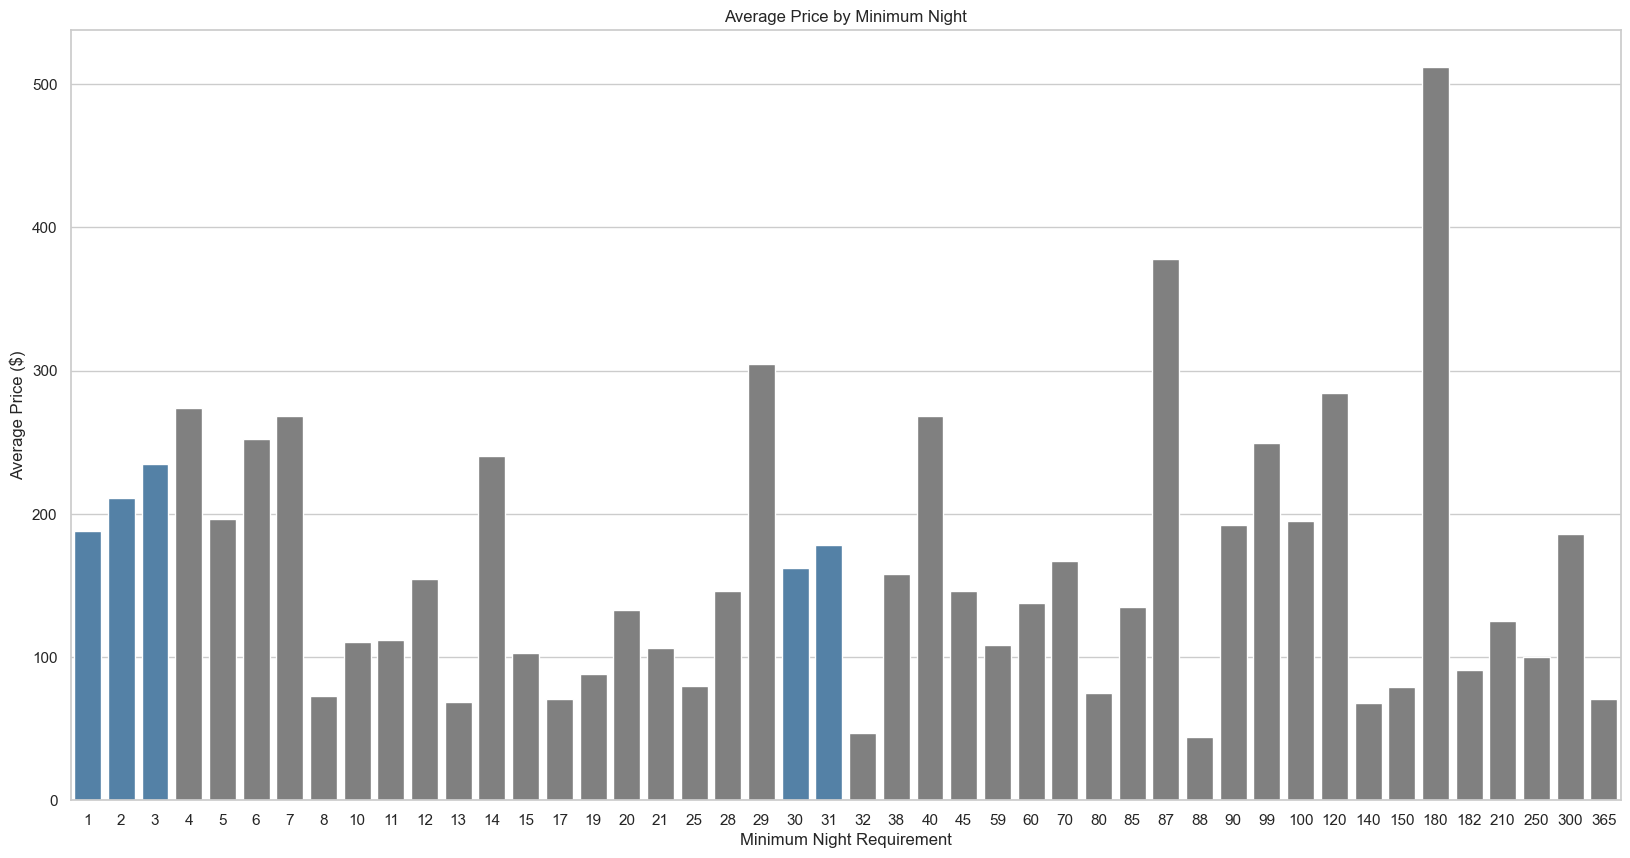

In [47]:
cols = ['steelblue' if (x == 1) | (x == 2) | (x == 3) | (x == 30) | (x == 31) 
        else 'grey' for x in minimum_night_avg_price.minimum_nights]

#create barplot with custom colors
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=minimum_night_avg_price.minimum_nights, y=minimum_night_avg_price.price, palette=cols)
plt.xlabel('Minimum Night Requirement')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Minimum Night')
plt.show()

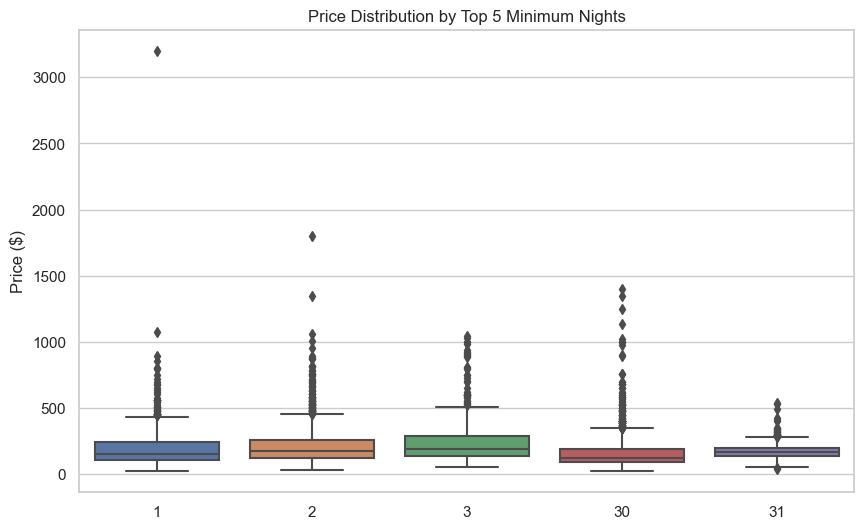

In [48]:
top5_minimum_night = airbnb.loc[(airbnb['minimum_nights'] == 1) | (airbnb['minimum_nights'] == 2) | 
                               (airbnb['minimum_nights'] == 3) | (airbnb['minimum_nights'] == 30) | 
                               (airbnb['minimum_nights'] == 31)]

plt.subplots(figsize=(10,6))
sns.boxplot(x='minimum_nights', y='price', data=top5_minimum_night)
plt.ylabel('Price ($)')
plt.xlabel('')
plt.title('Price Distribution by Top 5 Minimum Nights')
sns.set(style='whitegrid')
plt.show()

In [49]:
# Calculation to detect outliers.
#Q1 = np.percentile(airbnb['price'], 25, method='midpoint')
#Q3 = np.percentile(airbnb['price'], 75, method='midpoint')
#IQR = Q3 - Q1

#upper = Q3+1.5*IQR
#lower = Q1-1.5*IQR

In [50]:
# Duplicate data frame for analysis.
#airbnb_remove_outlier = airbnb

In [51]:
# Total number of listings with price above upper outlier range.
#(airbnb_remove_outlier['price'] > upper).sum()

In [52]:
# Removed all outliers for price column
#airbnb_remove_outlier = airbnb_remove_outlier.loc[airbnb_remove_outlier['price'] <= upper]

In [53]:
# Minimum night vs price with outliers data.
#plt.subplots(figsize=(20,6))
#sns.barplot(x='minimum_nights', y='price', data=minimum_night_avg_price)

In [54]:
#minimum_night_avg_price_remove_outlier = airbnb_remove_outlier.groupby(['minimum_nights'])['price'].mean().to_frame().reset_index().sort_values(by=['minimum_nights'], ascending=True)

In [55]:
#plt.subplots(figsize=(20,6))
#sns.barplot(x='minimum_nights', y='price', data=minimum_night_avg_price_remove_outlier)

# Checking for assumptions of the two sample t-test 

### Outliers removed from overall group and then filter

In [56]:
# Filter data by minimum_nights == 1 and make histogram 
#airbnb_1 = airbnb_remove_outlier.loc[airbnb['minimum_nights'] == 1]

#plt.hist(airbnb_1['price'])

In [57]:
# Filter data by minimum_nights == 2 and make histogram (Skewed right but arguably normal distribution)
#airbnb_2 = airbnb_remove_outlier.loc[airbnb['minimum_nights'] == 2]

#plt.hist(airbnb_2['price'])

In [58]:
# std similar.
#airbnb_2['price'].std()

In [59]:
#airbnb_1['price'].std()

# Remove outliers after conditionaling 

In [60]:
#airbnb_1 = airbnb.loc[airbnb['minimum_nights'] == 1]

#Q1 = np.percentile(airbnb_1['price'], 25, method='midpoint')
#Q3 = np.percentile(airbnb_1['price'], 75, method='midpoint')
#IQR = Q3 - Q1

#upper = Q3+1.5*IQR
#lower = Q1-1.5*IQR

# Removed all outliers for price column
#airbnb_1_remove_outlier = airbnb_1.drop(airbnb_1[airbnb_1.price > upper].index)

In [61]:
#airbnb_2 = airbnb.loc[airbnb['minimum_nights'] == 2]

#Q1 = np.percentile(airbnb_2['price'], 25, method='midpoint')
#Q3 = np.percentile(airbnb_2['price'], 75, method='midpoint')
#IQR = Q3 - Q1

#upper = Q3+1.5*IQR
#lower = Q1-1.5*IQR

# Removed all outliers for price column
#airbnb_2_remove_outlier = airbnb_2.drop(airbnb_2[airbnb_2.price > upper].index)

In [62]:
#airbnb_30 = airbnb.loc[airbnb['minimum_nights'] == 30]

#Q1 = np.percentile(airbnb_30['price'], 25, method='midpoint')
#Q3 = np.percentile(airbnb_30['price'], 75, method='midpoint')
#IQR = Q3 - Q1

#upper = Q3+1.5*IQR
#lower = Q1-1.5*IQR

# Removed all outliers for price column
#airbnb_30_remove_outlier = airbnb_30.drop(airbnb_30[airbnb_30.price > upper].index)

# Correlation Analysis on relevant numerical variables

In [63]:
# Subset relevant numerical columns for correlation analysis

#airbnb_num = airbnb[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']]

In [64]:
#corr = airbnb_num.corr(method='pearson')
#corr

In [65]:
#airbnb['price'].corr(airbnb['number_of_reviews'])

In [66]:
#sns.scatterplot(x='number_of_reviews', y='price', data=airbnb)

In [67]:
#sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
#plt.show()

In [68]:
#pd.plotting.scatter_matrix(airbnb_num, figsize=(20,10), alpha=0.5)
#plt.show()

# Minimum Night analysis and statistical tests

In [69]:
import scipy.stats as stats
from scipy.stats import f_oneway

In [70]:
minimum_night_1 = airbnb.loc[airbnb['minimum_nights'] == 1, 'price']

In [71]:
minimum_night_2 = airbnb.loc[airbnb['minimum_nights'] == 2, 'price']

In [72]:
minimum_night_3 = airbnb.loc[airbnb['minimum_nights'] == 3, 'price']

In [73]:
minimum_night_30 = airbnb.loc[airbnb['minimum_nights'] == 30, 'price']

In [74]:
minimum_night_31 = airbnb.loc[airbnb['minimum_nights'] == 31, 'price']

In [75]:
# One-Way ANOVA test on average price based on minimum_night 1, 2, 3, 30, 31
# There is difference between average price based on minimum_nights

f_oneway(minimum_night_1, minimum_night_2, minimum_night_3, minimum_night_30, minimum_night_31)

F_onewayResult(statistic=46.77747109202835, pvalue=9.020777570959149e-39)

In [76]:
# Test: One-Way ANOVA test on average price based on minimum_night 1, 2, 3

# Result: There is difference between average price based on minimum_nights 1, 2, 3

f_oneway(minimum_night_1, minimum_night_2, minimum_night_3)

F_onewayResult(statistic=28.297992914609104, pvalue=6.239449032310822e-13)

In [77]:
minimum_night_1.std()

136.15354731417708

In [78]:
minimum_night_2.std()

136.15316157940836

In [79]:
minimum_night_3.std()

156.934309433738

In [80]:
minimum_night_30.std()

130.95482981921424

In [81]:
minimum_night_31.std()

62.25983253260446

### Performing Two-Sample T-test on minimum_night == 1 and minimum_night == 2 

In [82]:
#stats.ttest_ind(a=minimum_night_1, b=minimum_night_2, equal_var=False)

### Performing Two-Sample T-test on minimum_night == 2 and minimum_night == 3

In [83]:
#stats.ttest_ind(a=minimum_night_2, b=minimum_night_3, equal_var=False)

### Performing Two-Sample T-test on minimum_night == 30 and minimum_night == 31

In [84]:
stats.ttest_ind(a=minimum_night_30, b=minimum_night_31, equal_var=False)

Ttest_indResult(statistic=-3.5160127392598204, pvalue=0.0004515893214547837)

### Remove outliers from original data and sort based on average price by neighborhood group

In [85]:
# Calculation to detect outliers.
#Q1 = np.percentile(airbnb['price'], 25, method='midpoint')
#Q3 = np.percentile(airbnb['price'], 75, method='midpoint')
#IQR = Q3 - Q1

#upper = Q3+1.5*IQR
#lower = Q1-1.5*IQR

# Remove all outliers for price column
#airbnb_outlier_removed = airbnb.drop(airbnb[airbnb.price > upper].index)

In [86]:
#neighbor_group_2 = airbnb_outlier_removed.groupby(['neighborhood_group'])['price'].mean() \
#        .to_frame().reset_index().sort_values(by=['price'], ascending=True)

In [87]:
#fig, ax = plt.subplots(figsize=(10,6))
#bar = ax.barh(neighbor_group_2['neighborhood_group'], neighbor_group_2['price'])
#plt.tight_layout()

#rects = ax.patches
#for rect in rects:
#    x_value = rect.get_width()
#    y_value = rect.get_y() + rect.get_height() / 2
#    label = '{:,.0f}'.format(x_value)
#    space = -30
#    plt.annotate(label, (x_value, y_value), xytext=(space,0), textcoords='offset points', va='center', ha='left',color='white')

#plt.xticks([])
#plt.title('Average Daily Price by Neighborhood Group')
#plt.show()

### Top 10 by listings and group them by individual and company and compare prices 

In [88]:
# filter by top 10 host_name

list =['Blueground', 'Melissa', 'Vacasa Washington', 'Landing', 'Amy', 'Vince', 'Zeus Seattle', 'David', 'Joanne', 'Cherry']
airbnb_indiv_comp = airbnb[airbnb.host_name.isin(list)]

In [89]:
# If host_name seems like a company, assign "company" to comp_type column, else assign "individual"

conditions =[(airbnb_indiv_comp['host_name'] == 'Blueground') | (airbnb_indiv_comp['host_name'] == 'Vacasa Washington') | 
             (airbnb_indiv_comp['host_name'] == 'Landing') | (airbnb_indiv_comp['host_name'] == 'Zeus Seattle')]

choice = ['company']


airbnb_indiv_comp['comp_type'] = np.select(conditions, choice, default='NA')
airbnb_indiv_comp['comp_type'].loc[airbnb_indiv_comp['comp_type'] == 'NA'] = 'individual'

C:\Users\sungh\AppData\Local\Temp\ipykernel_38380\4070741808.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_indiv_comp['comp_type'] = np.select(conditions, choice, default='NA')
C:\Users\sungh\AppData\Local\Temp\ipykernel_38380\4070741808.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_indiv_comp['comp_type'].loc[airbnb_indiv_comp['comp_type'] == 'NA'] = 'individual'


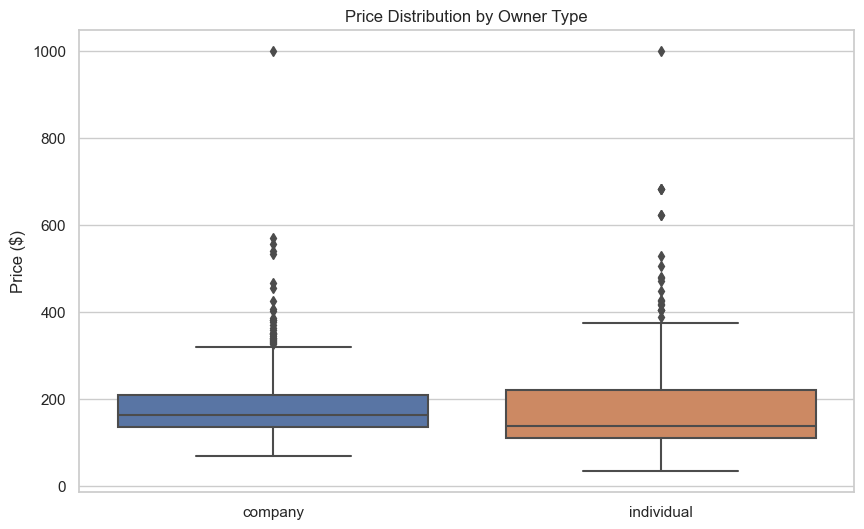

In [90]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='comp_type', y='price', data=airbnb_indiv_comp)
plt.ylabel('Price ($)')
plt.xlabel('')
plt.title('Price Distribution by Owner Type')
sns.set(style='whitegrid')
plt.show()

C:\Users\sungh\AppData\Local\Temp\ipykernel_38380\1432945821.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot = sns.barplot(x='seattle_region', y='price', data=airbnb_indiv_comp, hue='comp_type', ci=0)


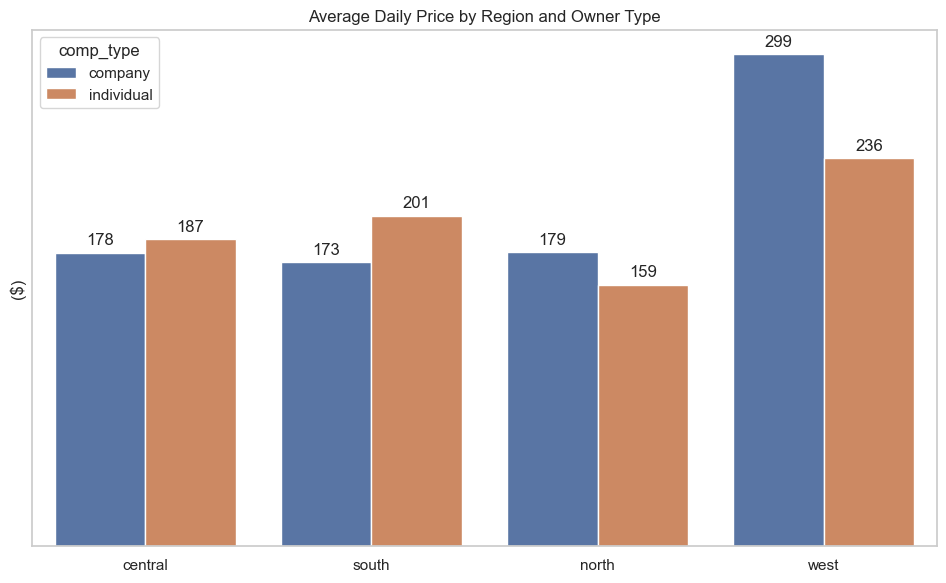

In [91]:
plt.subplots(figsize=(10,6))
splot = sns.barplot(x='seattle_region', y='price', data=airbnb_indiv_comp, hue='comp_type', ci=0)
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.yticks([])
plt.ylabel('($)')
plt.xlabel('')
plt.title('Average Daily Price by Region and Owner Type')
plt.show()

In [92]:
ind_comp = airbnb_indiv_comp.groupby(['comp_type'])['price'].mean().to_frame().reset_index()

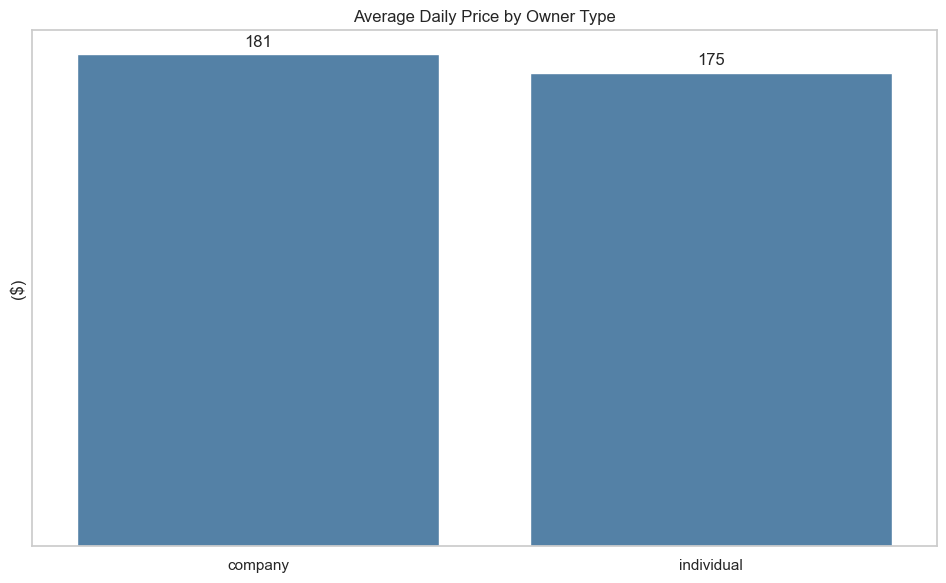

In [93]:
plt.subplots(figsize=(10,6))
splot = sns.barplot(x='comp_type', y='price', data=ind_comp, color='steelblue')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.yticks([])
plt.ylabel('($)')
plt.xlabel('')
plt.title('Average Daily Price by Owner Type')
plt.show()

In [94]:
individual_df = airbnb_indiv_comp.loc[airbnb_indiv_comp['comp_type'] == 'individual']

In [95]:
company_df = airbnb_indiv_comp.loc[airbnb_indiv_comp['comp_type'] == 'company']

In [96]:
company_df['price'].std()

77.06150573053804

In [97]:
individual_df['price'].std()

110.21252742116731

In [98]:
# Cannot reject null hypothesis that prices are different between individual and company listings.

stats.ttest_ind(a=company_df['price'], b=individual_df['price'], equal_var=False)

Ttest_indResult(statistic=1.1305099293450267, pvalue=0.2586238559491653)

# ANOVA TEST FOR PRICE DIFFERENCE BY REGION 

In [99]:
north = airbnb.loc[airbnb['seattle_region'] == 'north', 'price']

south = airbnb.loc[airbnb['seattle_region'] == 'south', 'price']

west = airbnb.loc[airbnb['seattle_region'] == 'west', 'price']

central = airbnb.loc[airbnb['seattle_region'] == 'central', 'price']

# One-Way ANOVA test for difference in mean value of price by region. 
# There is difference between the mean value of price by region.

f_oneway(north, south, west, central)

F_onewayResult(statistic=38.80115494124916, pvalue=7.545261646980671e-25)

In [100]:
# Create column with price * minimum_nights = average income per listing.
#airbnb['average_income'] = airbnb['price'] * airbnb['minimum_nights']

In [101]:
#average_income_bygroup = airbnb.groupby(['neighborhood_group'])['average_income'].mean().to_frame().reset_index().sort_values(by=['average_income'], ascending=False)

In [102]:
#plt.subplots(figsize=(10,6))
#splot = sns.barplot(x='neighborhood_group', y='average_income', data=average_income_bygroup, color='steelblue')
#plt.tight_layout()
#for p in splot.patches:
    #splot.annotate(format(p.get_height(), '.0f'),
                  #(p.get_x() + p.get_width() / 2, p.get_height()),
                  #ha='center', va='center',
                  #xytext = (0,9),
                  #textcoords = 'offset points')
#plt.yticks([])
#plt.ylabel('($)')
#plt.xlabel('')
#plt.xticks(rotation=45)
#sns.set(style='whitegrid')
#plt.title('Average Income by Neighborhood Group')
#plt.show()

In [103]:
#average_income_byregion = airbnb.groupby(['seattle_region'])['average_income'].mean().to_frame().reset_index().sort_values(by=['average_income'], ascending=False)

In [104]:
#plt.subplots(figsize=(10,6))
#splot = sns.barplot(x='seattle_region', y='average_income', data=average_income_byregion, color='steelblue')
#plt.tight_layout()
#for p in splot.patches:
    #splot.annotate(format(p.get_height(), '.0f'),
                  #(p.get_x() + p.get_width() / 2, p.get_height()),
                  #ha='center', va='center',
                  #xytext = (0,9),
                  #textcoords = 'offset points')
#plt.yticks([])
#plt.ylabel('($)')
#plt.xlabel('')
#plt.xticks(rotation=45)
#sns.set(style='whitegrid')
#plt.title('Average Income by Region')
#plt.show()

In [105]:
#airbnb_indiv_comp['average_income'] = airbnb_indiv_comp['price'] * airbnb_indiv_comp['minimum_nights']

In [106]:
#average_income_comptype = airbnb_indiv_comp.groupby(['comp_type'])['average_income'].mean().to_frame().reset_index().sort_values(by=['average_income'], ascending=False)

In [107]:
#plt.subplots(figsize=(10,6))
#splot = sns.barplot(x='comp_type', y='average_income', data=average_income_comptype, color='steelblue')
#plt.tight_layout()
#for p in splot.patches:
    #splot.annotate(format(p.get_height(), '.0f'),
                  #(p.get_x() + p.get_width() / 2, p.get_height()),
                  #ha='center', va='center',
                  #xytext = (0,9),
                  #textcoords = 'offset points')
#plt.yticks([])
#plt.ylabel('($)')
#plt.xlabel('')
#sns.set(style='whitegrid')
#plt.title('Average Income by Owner Type')
#plt.show()

# ANOVA TEST FOR AVERAGE INCOME DIFFERENCE BY REGION

In [108]:
#north = airbnb.loc[airbnb['seattle_region'] == 'north', 'average_income']

#south = airbnb.loc[airbnb['seattle_region'] == 'south', 'average_income']

#west = airbnb.loc[airbnb['seattle_region'] == 'west', 'average_income']

#central = airbnb.loc[airbnb['seattle_region'] == 'central', 'average_income']

# One-Way ANOVA test for difference in mean value of price by region. 
# There is difference between the mean value of price by region.

#f_oneway(north, south, west, central)

# Prepping for regression analysis

In [109]:
# take log10 of price to normalize the
airbnb['log10_price'] = np.log10(airbnb['price'])

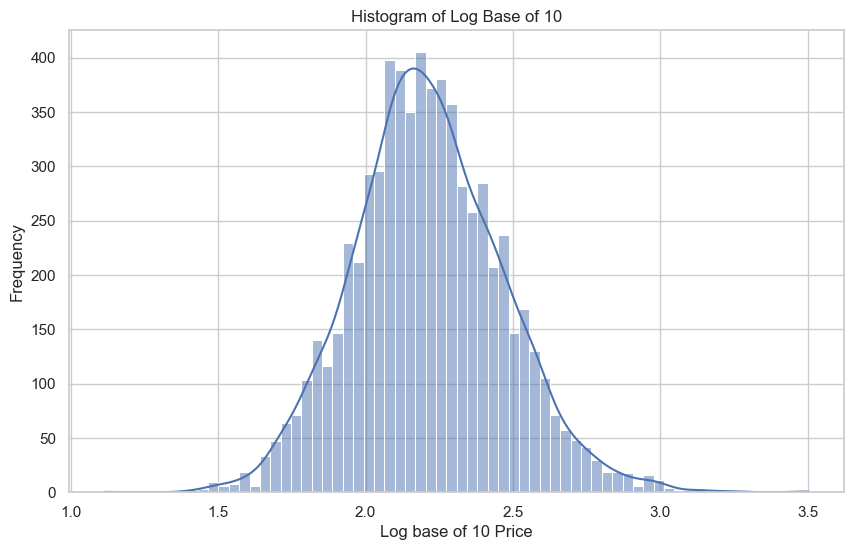

In [110]:
# Transforming response variable, price, into log base of 10.

# Log-normal distribution

plt.subplots(figsize=(10,6))
sns.histplot(data=airbnb, x='log10_price', kde=True)
plt.xlabel('Log base of 10 Price')
plt.ylabel('Frequency')
plt.title('Histogram of Log Base of 10')
plt.show()

In [111]:
#pd.get_dummies(airbnb, columns=['room_type', 'seattle_region'], prefix='dmy')

In [112]:
#airbnb.info()

In [113]:
model_1 = smf.ols(formula='log10_price ~ seattle_region + room_type' , data=airbnb).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log10_price   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     405.0
Date:                Sat, 13 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:27:51   Log-Likelihood:                 547.86
No. Observations:                6629   AIC:                            -1084.
Df Residuals:                    6623   BIC:                            -1043.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.3027      0.004    543.874      0.000       2.294       2.311
seattle_region[T.north]      -0.0683      0.006    -10.951      0.000      -0.081      -0.056
seattle_region[T.south]      -0.0905      0.009    -10.015      0.000      -0.108      -0.073
seattle_region[T.west]       -0.0732      0.010     -7.525      0.000      -0.092      -0.054
room_type[T.Private room]    -0.3118      0.008    -40.875      0.000      -0.327      -0.297
room_type[T.Shared room]     -0.4306      0.054     -7.951      0.000      -0.537      -0.324
==============================================================================
Omnibus:                      542.252   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.890
Skew:                           0.684   Prob(JB):                    1.08e-162
Kurtosis:                       3.911   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
model_2 = smf.ols(formula='log10_price ~ seattle_region + room_type + number_of_reviews' , data=airbnb).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:            log10_price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     358.0
Date:                Sat, 13 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:27:52   Log-Likelihood:                 594.68
No. Observations:                6629   AIC:                            -1175.
Df Residuals:                    6622   BIC:                            -1128.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [115]:
model_3 = smf.ols(formula='log10_price ~ seattle_region + room_type + number_of_reviews + minimum_nights' , data=airbnb).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            log10_price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     358.3
Date:                Sat, 13 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:27:52   Log-Likelihood:                 728.23
No. Observations:                6629   AIC:                            -1440.
Df Residuals:                    6621   BIC:                            -1386.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# Model Comparison

In [116]:
anova_test1 = sm.stats.anova_lm(model_1, model_2)
print(anova_test1)

   df_resid         ssr  df_diff   ss_diff          F        Pr(>F)
0    6623.0  328.994605      0.0       NaN        NaN           NaN
1    6622.0  324.379351      1.0  4.615254  94.217499  3.967740e-22


In [117]:
anova_test2 = sm.stats.anova_lm(model_2, model_3)
print(anova_test2)

   df_resid         ssr  df_diff    ss_diff           F        Pr(>F)
0    6622.0  324.379351      0.0        NaN         NaN           NaN
1    6621.0  311.569397      1.0  12.809954  272.217702  5.796404e-60


# Calculating log-normal coefficients

In [118]:
(np.exp(model_3.params) - 1 ) * 100

Intercept                    957.199778
seattle_region[T.north]       -7.184130
seattle_region[T.south]       -9.800613
seattle_region[T.west]        -8.102199
room_type[T.Private room]    -27.048533
room_type[T.Shared room]     -32.026734
number_of_reviews             -0.034244
minimum_nights                -0.237072
dtype: float64